# Bank Marketing

Entender o perfil e as necessidades dos clientes é muito importante para um negócio. Em muitos casos, esse tipo de análise não só permite oferecer uma experiência personalizada aos consumidores, como também contribui para o direcionamento de campanhas e o desenvolvimento de novos produtos, entre muitas outras possibilidades.

Com isso em mente, este projeto contém uma análise dos dados anônimos de uma campanha de marketing de um banco português, doados para a UC Irvine - Machine Learning Repository. A campanha foi realizada por telefone e tinha como produto um depósito a prazo bancário. O projeto tem como objetivos:



*   Entender o perfil dos clientes que aderiram ou não ao produto através da campanha;
*   Entender quais são os fatores associados à maior probabilidade de aquisição do produto;
*   Construir um modelo que prevê se um cliente irá adquirir ou não o produto;
*   Recomendar ações com base na análise dos dados.

In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.contingency import association
from statsmodels.stats.proportion import proportions_ztest, proportion_confint, confint_proportions_2indep
import scipy.stats as st
import statsmodels.stats.api as sms
from scipy.stats import chi2_contingency
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc

In [ ]:
# leitura do dataset
df = pd.read_csv("bank-full.csv", sep = ';')

# 1 - Compreendendo o dataset

Este tópico tem como objetivo entender como os dados estão estruturados e identificar possíveis necessidades de ajuste. Cada coluna possui o seguinte significado:

* **age:** Idade do cliente.

* **job:** Profissão do cliente.
* **marital:** Estado civil do cliente.
* **education:** Nível de educação do cliente.
* **default:** Informa se o cliente possui crédito inadimplente.
* **balance:** Saldo médio anual do cliente.
* **housing:** Informa se o cliente possui emprestimo imobiliário.
* **loan:** Informa se o cliente possui empréstimo pessoal.
* **contact:** Forma de contato (celular ou telefone fixo).
* **day:** Dia da semana do contato.
* **month:** Mês que foi realizado o contato.
* **campaign:** Número de contatos realizados para esse cliente nesta campanha.
* **pdays:** Número de dias que se passaram desde que o cliente foi contatado por uma campanha anterior (-1 significa que o cliente nunca foi contatado).
* **previous:** Número de contatos realizados antes desta campanha para este cliente.
* **poutcome:** Resultado da última campanha de marketing para este cliente, se ele aderiu ao produto ou não.
* **y:** Informa se o cliente adquiriu o produto da campanha atual (depósito a prazo) ou não, será a nossa variável target.

In [ ]:
# verificando o tamanho do dataset
df.shape

(45211, 16)

O dataset possui 45211 linhas e 16 colunas.

In [ ]:
# verificando as primeiras linhas
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


Com a saída acima já podemos perceber que existem valores marcados como "unknown".

In [ ]:
# verificando se há linhas duplicadas no dataset
df.duplicated().sum()

16

Há 16 linhas idênticas no dataset. Como são poucos casos e é possível que exista clientes com as exatas mesmas características eu decidi manter essas linhas.

In [ ]:
# verificando o tipo das colunas e a quantidade de valores não-nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


Os tipos das colunas estão corretos, porém irei transformar a coluna "day" em categórica. A saída acima indicou que não existem valores nulos, porém vimos que existem valores marcados como "unknown", portanto devemos verificar a quantidade desses valores. Além disso, irei verificar também se existe um valor que se repete com muita frequência.

In [ ]:
# verificando as categorias das variáveis categóricas
def valores_unicos_categoricos(df):
  colunas_categoricas = df.select_dtypes(include = ['object']).columns
  for i in colunas_categoricas:
    print(f"Valores da coluna: {i}")
    print(df[i].unique())
    print("-"*50)
valores_unicos_categoricos(df)

Valores da coluna: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
--------------------------------------------------
Valores da coluna: marital
['married' 'single' 'divorced']
--------------------------------------------------
Valores da coluna: education
['tertiary' 'secondary' 'unknown' 'primary']
--------------------------------------------------
Valores da coluna: default
['no' 'yes']
--------------------------------------------------
Valores da coluna: housing
['yes' 'no']
--------------------------------------------------
Valores da coluna: loan
['no' 'yes']
--------------------------------------------------
Valores da coluna: contact
['unknown' 'cellular' 'telephone']
--------------------------------------------------
Valores da coluna: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
--------------------------------------------------
Valores 

In [ ]:
# contagem de "unknown"
def unknowns(df):
    unknown_contagem = df.apply(lambda col: (col == 'unknown').sum())
    return unknown_contagem
unknowns(df)

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0


In [ ]:
# contando os valores de cada coluna e exibindo os 5 que mais se repetem
def contagem_valores_colunas(df):
    for column in df.columns:
        print(f"Contagem de valores para a coluna: {column}")
        print(df[column].value_counts().head(5))
        print("-"*50)
contagem_valores_colunas(df)

Contagem de valores para a coluna: age
age
32    2085
31    1996
33    1972
34    1930
35    1894
Name: count, dtype: int64
--------------------------------------------------
Contagem de valores para a coluna: job
job
blue-collar    9732
management     9458
technician     7597
admin.         5171
services       4154
Name: count, dtype: int64
--------------------------------------------------
Contagem de valores para a coluna: marital
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
--------------------------------------------------
Contagem de valores para a coluna: education
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
--------------------------------------------------
Contagem de valores para a coluna: default
default
no     44396
yes      815
Name: count, dtype: int64
--------------------------------------------------
Contagem de valores para a coluna: balance
balance
0    3514


É possível observar que as colunas "job", "education", "contact" e "poutcome" possuem valores "unknown", além disso a coluna "pdays" possui muitos valores "-1" (que significa que o cliente nunca foi contatado anteriormente), é necessário então lidar com esses valores.

# 2 - Limpeza e manuseio dos dados

Neste tópico irei resolver os problemas encontrados no tópico anterior, deixarei também algumas observações:

* A coluna "pdays" possui muitos valores "-1", e esse valor representa uma categoria (cliente nunca contatado) enquanto os demais valores da coluna são numéricos. A solução então é transformar a coluna "pdays" nas categorias "Nunca contatado", "Mais de 1 mês" e "Menos de 1 mês";

* A coluna "contact" será removida porque possui muitos valores ausentes e hoje em dia poucas pessoas utilizam telefone fixo;

* Como a ausência de valores nas colunas "job" e "education" pode ser uma informação do tipo MNAR, por exemplo "clientes que adquirem o produto da campanha não gostam de divulgar o trabalho" decidi manter essas linhas com "unknown" para verificar se eles são relevantes mais à frente, podendo ser removidos posteriormente conforme a necessidade. Além disso, isso evita a perda de informações;

* A coluna "poutcome" possui muitos valores desconhecidos mas é uma boa informação que eu não quero perder, portanto irei deixar o unknown como se fosse uma categoria. Irei juntar a categoria "other" com a "unknown" porque em ambas a informação é desconhecida;

* A coluna "day" será transformada nas categorias "Começo do mês" e "Fim do mês", porque é a informação mais relevante a ser extraída dessa coluna (não há como identificar o dia da semana).

In [ ]:
# criando função para categorizar a coluna pdays
def categorizar(valor):
  if valor > 31:
    return "Mais de 1 mês"
  if 0 <= valor <= 31:
    return "Menos de 1 mês"
  else:
    return "Nunca contatado"

# aplicando a função na coluna pdays
df['pdays'] = df['pdays'].apply(categorizar)

# renomeando a coluna pdays
df = df.rename(columns={'pdays': 'pdays_categorico'})

In [ ]:
# checando se a quantidade de "Nunca contatado" está correta
df['pdays_categorico'].value_counts()

,count
pdays_categorico,
Nunca contatado,36954
Mais de 1 mês,8064
Menos de 1 mês,193


In [ ]:
# removendo a coluna "contact"
df = df.drop(columns=['contact'])

# checando o resultado
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays_categorico,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,1,Nunca contatado,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,1,Nunca contatado,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1,Nunca contatado,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,1,Nunca contatado,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,1,Nunca contatado,0,unknown,no


In [ ]:
# juntando os valores "other" com "unknown" da coluna "poutcome"
df['poutcome'] = df['poutcome'].replace({'other':'unknown'})

# checando o resultado
df['poutcome'].unique()

array(['unknown', 'failure', 'success'], dtype=object)

In [ ]:
# criando função para categorizar a coluna day
def categorizar_dia(valor):
  if valor <= 15:
    return "Início do mês"
  else:
    return "Fim do mês"

# aplicando a função na coluna day
df['day'] = df['day'].apply(categorizar_dia)

# renomeando a coluna day
df = df.rename(columns={'day': 'day_categorico'})

In [ ]:
# checando os valores da coluna day
df['day_categorico'].unique()

array(['Início do mês', 'Fim do mês'], dtype=object)

Com os valores ajustados podemos partir para a análise descritiva e da relação entre as variáveis.

# 3 - Análise descritiva e relação entre as variáveis

Agora será feito a exploração das variáveis e identificação de como elas estão relacionadas umas com as outras. Com o resultado será possível elaborar perguntas específicas sobre as variáveis para posteriormente serem respondidas/comprovadas com teste de hipótese e/ou regressão logística.

## Variável target

<Axes: ylabel='y'>

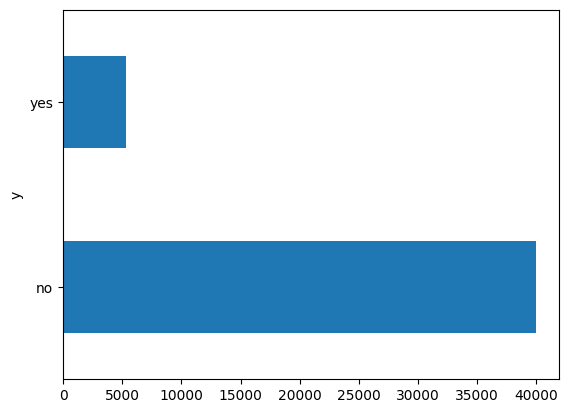

In [ ]:
# contagem de valores da variável target (y)
df['y'].value_counts().plot(kind='barh')

In [ ]:
# verificando o percentual de "yes" e "no" da variável target (y)
pd.crosstab(index=df['y'], columns='count',normalize=True)*100

col_0,count
y,
no,88.30152
yes,11.69848


## Variáveis categóricas

In [ ]:
# verificando o nome das colunas categóricas
df.select_dtypes(include = ['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'day_categorico', 'month', 'pdays_categorico', 'poutcome', 'y'],
      dtype='object')

<Axes: ylabel='job'>

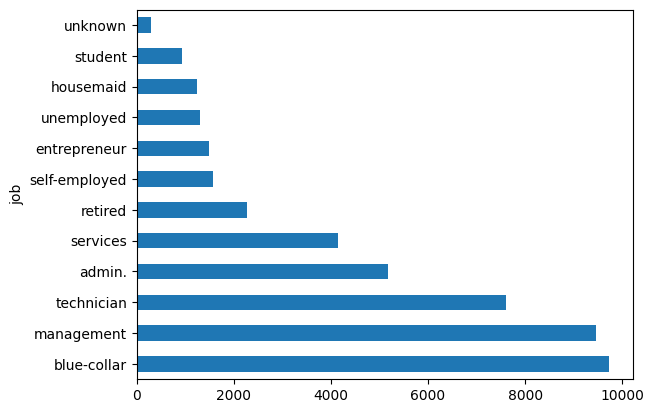

In [ ]:
# variável job
df['job'].value_counts().plot(kind='barh')

<Axes: ylabel='marital'>

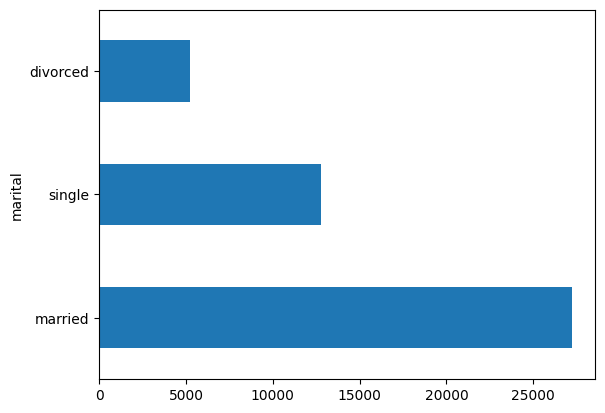

In [ ]:
# variável marital
df['marital'].value_counts().plot(kind='barh')

<Axes: ylabel='education'>

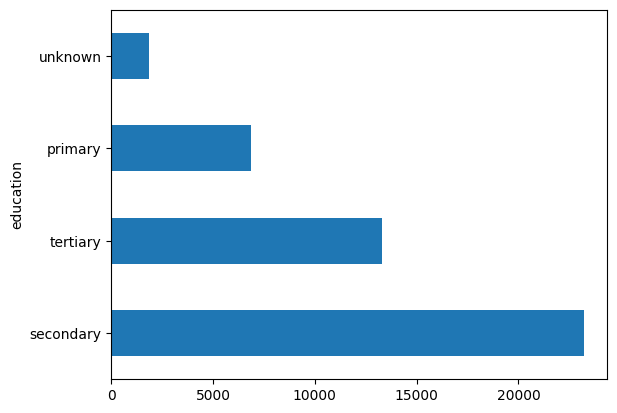

In [ ]:
# variável education
df['education'].value_counts().plot(kind='barh')

<Axes: ylabel='default'>

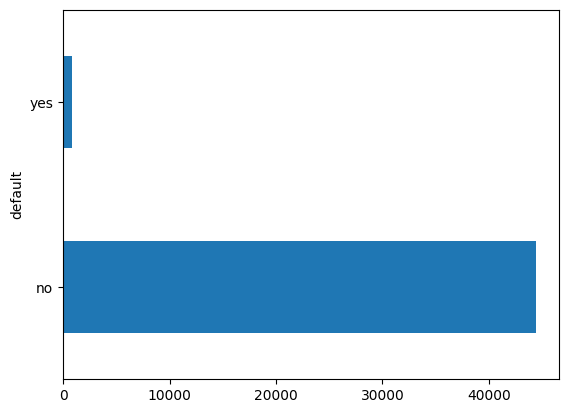

In [ ]:
# variável default
df['default'].value_counts().plot(kind='barh')

<Axes: ylabel='housing'>

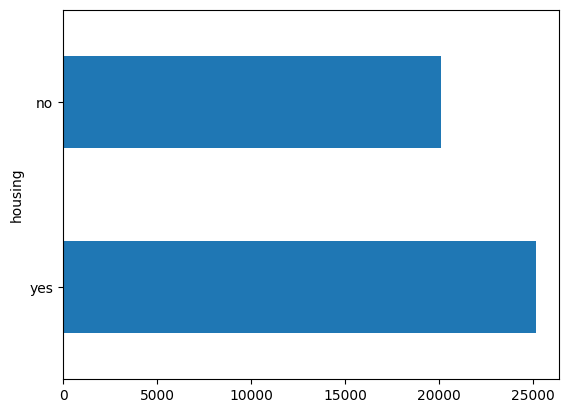

In [ ]:
# variável housing
df['housing'].value_counts().plot(kind='barh')

<Axes: ylabel='loan'>

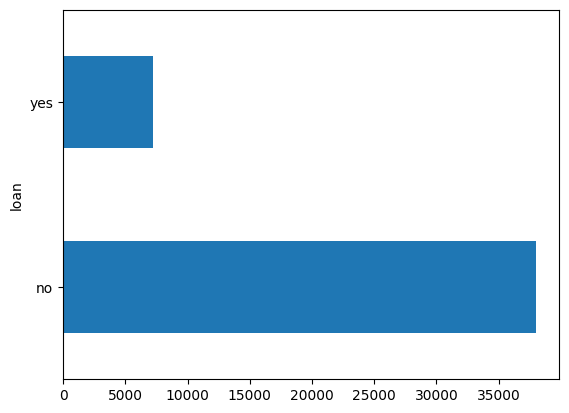

In [ ]:
# variável loan
df['loan'].value_counts().plot(kind='barh')

<Axes: ylabel='day_categorico'>

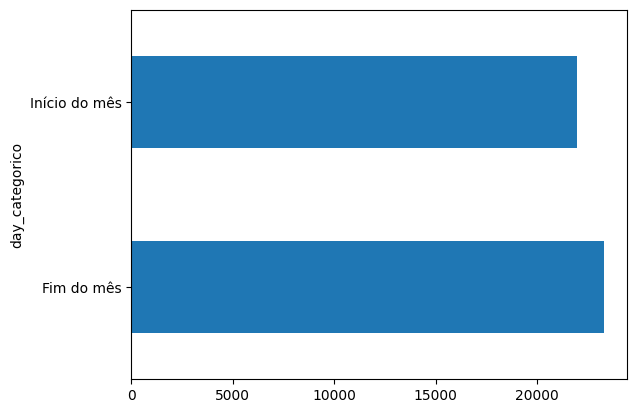

In [ ]:
# variável day_categorico
df['day_categorico'].value_counts().plot(kind='barh')

<Axes: ylabel='month'>

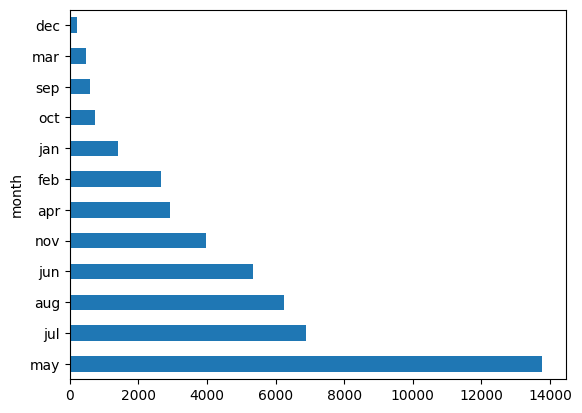

In [ ]:
# variável month
df['month'].value_counts().plot(kind='barh')

<Axes: ylabel='pdays_categorico'>

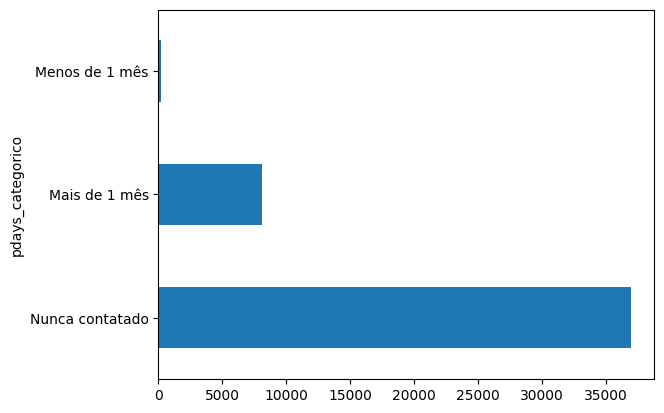

In [ ]:
# variável pdays_categorico
df['pdays_categorico'].value_counts().plot(kind='barh')

<Axes: ylabel='poutcome'>

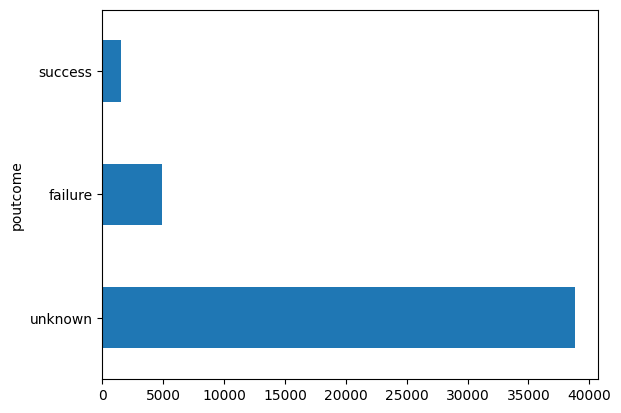

In [ ]:
# variável poutcome
df['poutcome'].value_counts().plot(kind='barh')

## Variáveis numéricas

In [ ]:
# verificando o nome das colunas numéricas
df.select_dtypes(include = ['int64']).columns

Index(['age', 'balance', 'campaign', 'previous'], dtype='object')

In [ ]:
# visão geral das variáveis numéricas
df.describe()

,age,balance,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,0.580323
std,10.618762,3044.765829,3.098021,2.303441
min,18.000000,-8019.000000,1.000000,0.000000
25%,33.000000,72.000000,1.000000,0.000000
50%,39.000000,448.000000,2.000000,0.000000
75%,48.000000,1428.000000,3.000000,0.000000
max,95.000000,102127.000000,63.000000,275.000000


<Axes: xlabel='age'>

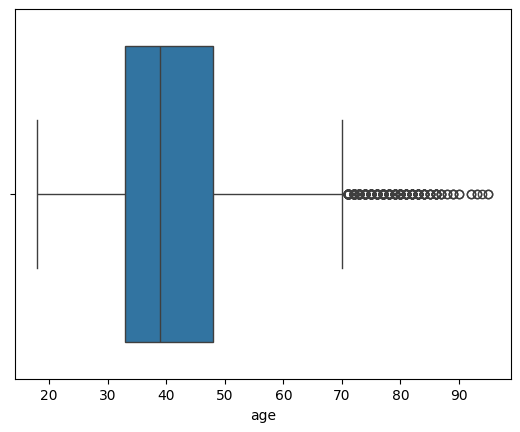

In [ ]:
# variável age
sns.boxplot(df['age'], orient="h")

<Axes: xlabel='balance'>

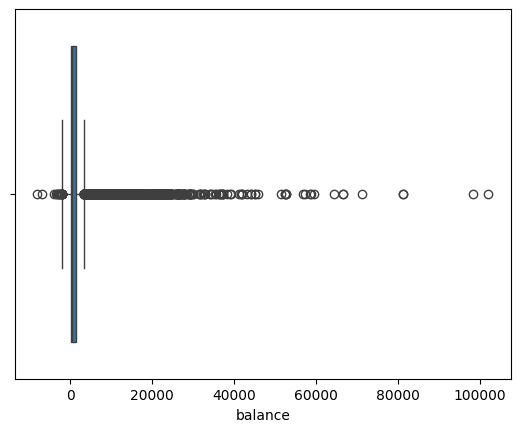

In [ ]:
# variável balance
sns.boxplot(df['balance'], orient="h")

<Axes: xlabel='campaign'>

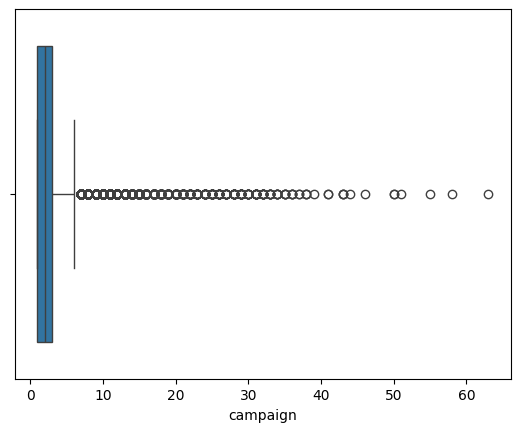

In [ ]:
# variável campaign
sns.boxplot(df['campaign'], orient="h")

<Axes: xlabel='previous'>

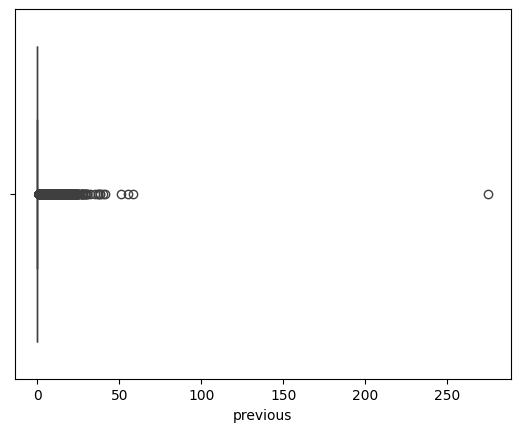

In [ ]:
# variável previous
sns.boxplot(df['previous'], orient="h")

Podemos ver que existem outliers em todas as variáveis numéricas. Pensando no negócio são todos outliers possíveis então irei mantê-los, porém existe um valor na coluna "previous" muito destoante e isso pode atrapalhar, portanto irei substituí-lo pela mediana.

In [ ]:
# verificando a linha com outlier da coluna previous
df.loc[df['previous'] >= 200]

,age,job,marital,education,default,balance,housing,loan,day_categorico,month,campaign,pdays_categorico,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,Início do mês,feb,2,Mais de 1 mês,275,unknown,no


In [ ]:
# alterando a linha com outlier da coluna previous
df.loc[29182, 'previous'] = 0

<Axes: xlabel='previous'>

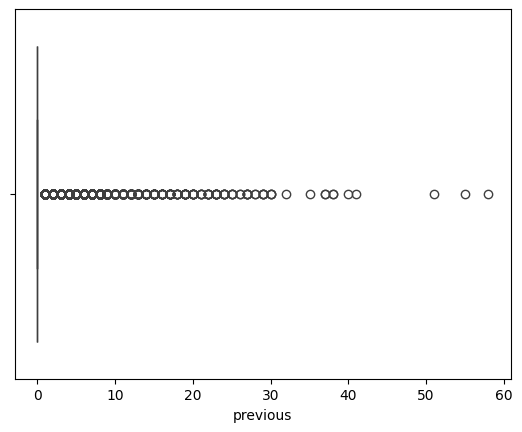

In [ ]:
# checando  o resultado
sns.boxplot(df['previous'], orient="h")

## Variáveis numéricas x numéricas

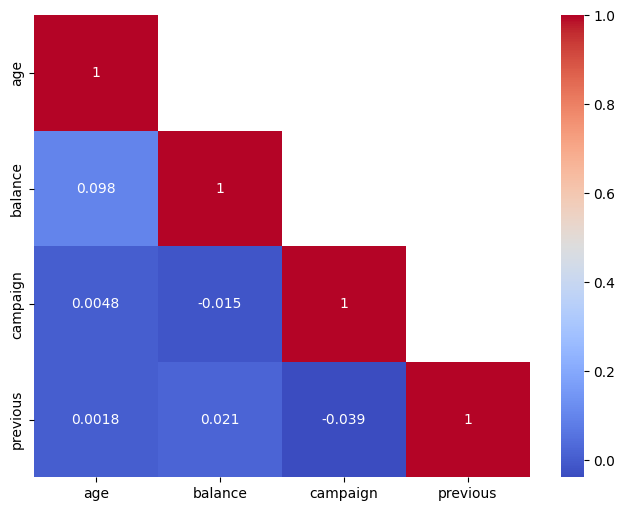

In [ ]:
# plotando a matriz de correlação (Pearson) entre as variáveis numéricas
colunas_numericas = df.select_dtypes(include=['int64'])
correlacao = colunas_numericas.corr()
mask = np.triu(np.ones_like(correlacao, dtype=bool), k=1)
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', mask=mask)
plt.show()

Não há forte correlação entre as variáveis numéricas.

## Variáveis categóricas x categóricas

In [ ]:
# visualizando o nome das variáveis categóricas
df.select_dtypes(include = ['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'day_categorico', 'month', 'pdays_categorico', 'poutcome', 'y'],
      dtype='object')

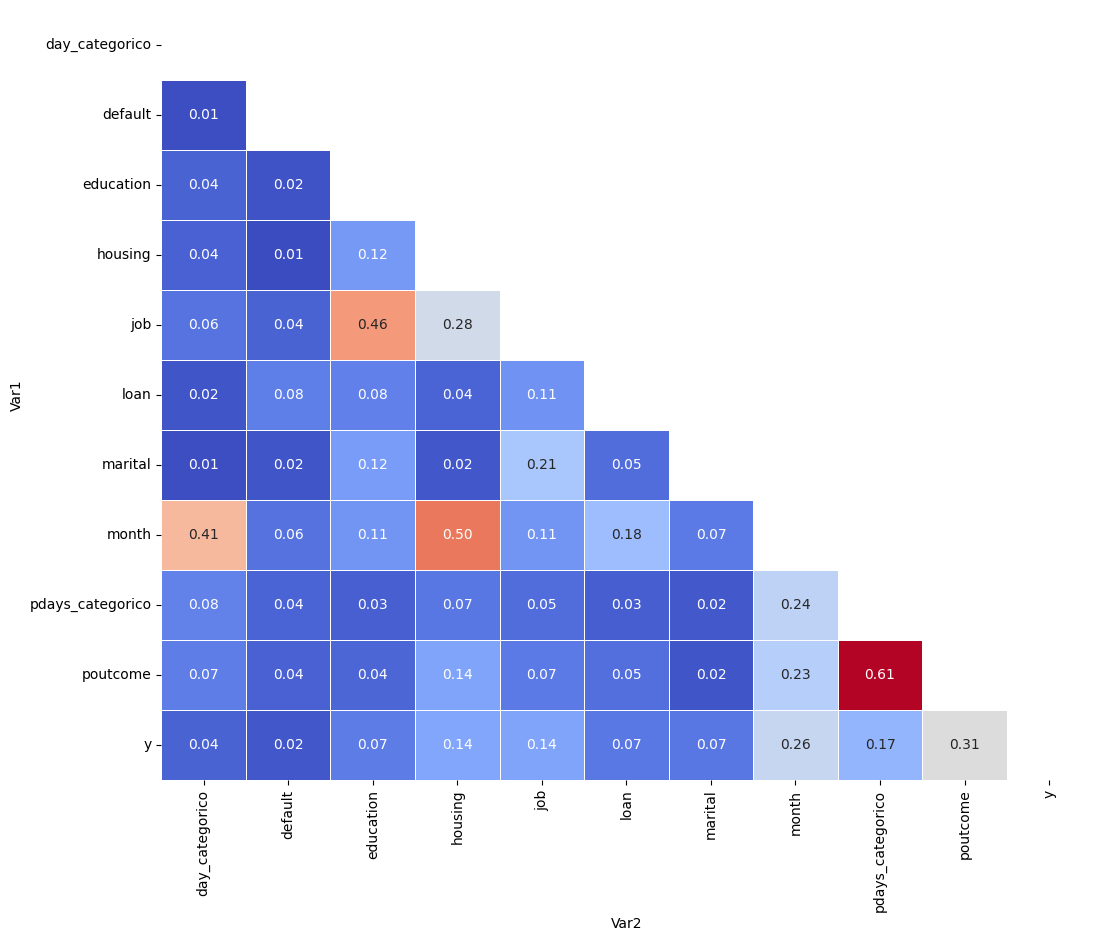

In [ ]:
# plotando a matriz de correlação (Cramer) entre as variáveis categóricas
colunas_categoricas = df.select_dtypes(include = ['object']).columns
cramersv_results = []
for var1 in colunas_categoricas:
  for var2 in colunas_categoricas:
    if var1 != var2:
      cramersv = association(pd.crosstab(df[var1], df[var2]),method='cramer')
      cramersv_results.append([var1, var2, cramersv])

cramersv_df = pd.DataFrame(cramersv_results, columns=['Var1', 'Var2', 'CramersV'])
cramersv_df = cramersv_df.pivot(index='Var1', columns='Var2', values='CramersV')

mask = np.triu(np.ones_like(cramersv_df, dtype=bool))

cramersv_df = cramersv_df.mask(mask)
cramersv_df = cramersv_df.round(3)

plt.figure(figsize=(12,10))
sns.heatmap(cramersv_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False)
plt.show()

Podemos ver que há uma correlação razoável entre "month x day_categorico", "job x education", "month x housing" e "poutcome x pdays_categorico", além disso não há forte correlação entre a variável target e as demais variáveis categóricas. Vamos avaliar o resultado do nosso futuro modelo e fazer ajustes com essas variáveis caso necessário.

### Target x job

In [ ]:
# tabela de frequências
pd.crosstab(index=df['job'], columns=df['y'])

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


Podemos ver que as classes estão suficientemente bem representadas. Vamos ver em percentual:

In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['job'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
job,,
admin.,87.797331,12.202669
blue-collar,92.725031,7.274969
entrepreneur,91.728312,8.271688
housemaid,91.209677,8.790323
management,86.244449,13.755551
retired,77.208481,22.791519
self-employed,88.157061,11.842939
services,91.116996,8.883004
student,71.321962,28.678038


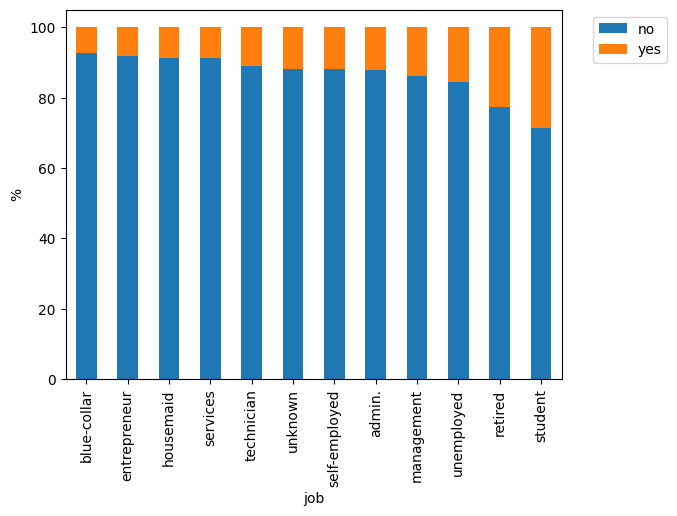

In [ ]:
# visualizando o percentual em gráfico
tabela.sort_values(by='yes').plot(kind='bar', stacked=True)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Target x marital

In [ ]:
# tabela de frequências
pd.crosstab(index=df['marital'], columns=df['y'])

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['marital'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
marital,,
divorced,88.054542,11.945458
married,89.876534,10.123466
single,85.050821,14.949179


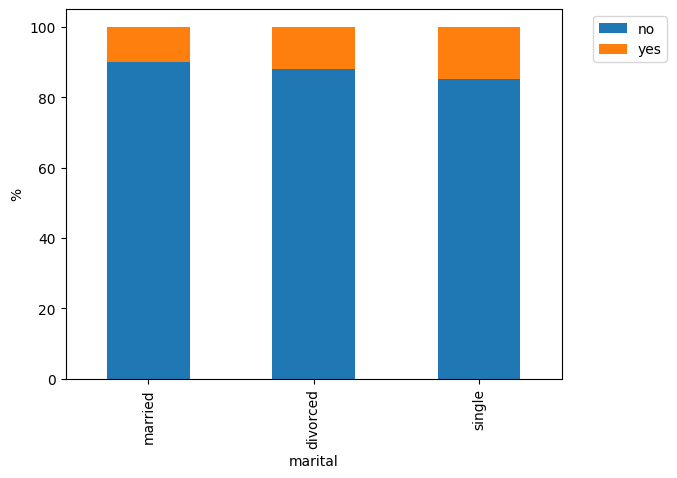

In [ ]:
# visualizando o percentual em gráfico
tabela.sort_values(by='yes').plot(kind='bar', stacked=True)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Target x education

In [ ]:
# tabela de frequências
pd.crosstab(index=df['education'], columns=df['y'])

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['education'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


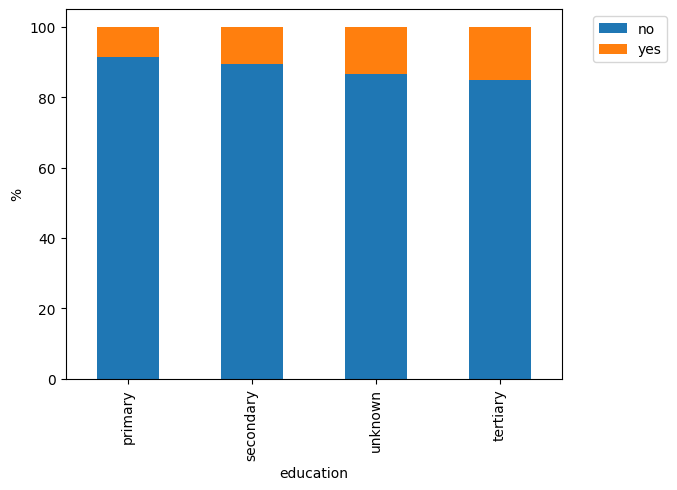

In [ ]:
# visualizando o percentual em gráfico
tabela.sort_values(by='yes').plot(kind='bar', stacked=True)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Target x default

In [ ]:
# tabela de frequências
pd.crosstab(index=df['default'], columns=df['y'])

y,no,yes
default,,
no,39159,5237
yes,763,52


In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['default'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
default,,
no,88.203892,11.796108
yes,93.619632,6.380368


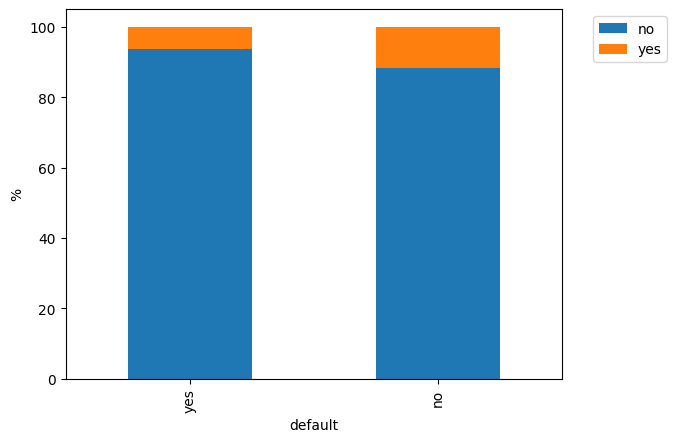

In [ ]:
# visualizando o percentual em gráfico
tabela.sort_values(by='yes').plot(kind='bar', stacked=True)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Target x housing

In [ ]:
# tabela de frequências
pd.crosstab(index=df['housing'], columns=df['y'])

y,no,yes
housing,,
no,16727,3354
yes,23195,1935


In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['housing'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
housing,,
no,83.297645,16.702355
yes,92.300040,7.699960


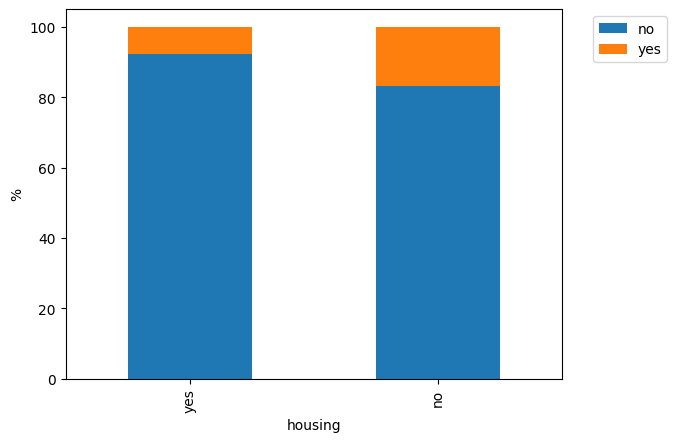

In [ ]:
# visualizando o percentual em gráfico
tabela.sort_values(by='yes').plot(kind='bar', stacked=True)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Target x loan

In [ ]:
# tabela de frequências
pd.crosstab(index=df['loan'], columns=df['y'])

y,no,yes
loan,,
no,33162,4805
yes,6760,484


In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['loan'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
loan,,
no,87.344273,12.655727
yes,93.318609,6.681391


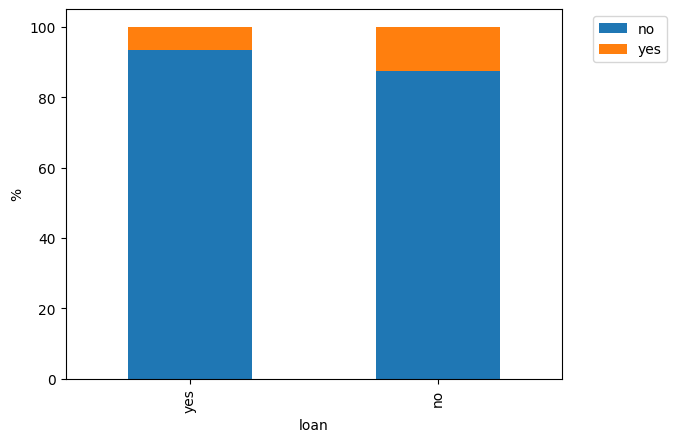

In [ ]:
# visualizando o percentual em gráfico
tabela.sort_values(by='yes').plot(kind='bar', stacked=True)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Target x day_categorico

In [ ]:
# tabela de frequências
pd.crosstab(index=df['day_categorico'], columns=df['y'])

y,no,yes
day_categorico,,
Fim do mês,20827,2441
Início do mês,19095,2848


In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['day_categorico'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
day_categorico,,
Fim do mês,89.509197,10.490803
Início do mês,87.020918,12.979082


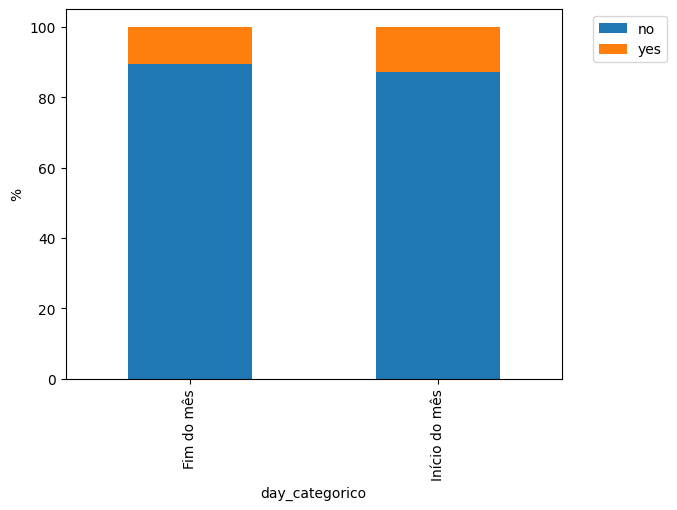

In [ ]:
# visualizando o percentual em gráfico
tabela.sort_values(by='yes').plot(kind='bar', stacked=True)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Target x month

In [ ]:
# tabela de frequências
tabela = pd.crosstab(index=df['month'], columns=df['y'])
tabela['Total'] = tabela.sum(axis=1)
tabela

y,no,yes,Total
month,,,
apr,2355,577,2932
aug,5559,688,6247
dec,114,100,214
feb,2208,441,2649
jan,1261,142,1403
jul,6268,627,6895
jun,4795,546,5341
mar,229,248,477
may,12841,925,13766


In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['month'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
month,,
apr,80.320600,19.679400
aug,88.986714,11.013286
dec,53.271028,46.728972
feb,83.352208,16.647792
jan,89.878831,10.121169
jul,90.906454,9.093546
jun,89.777195,10.222805
mar,48.008386,51.991614
may,93.280546,6.719454


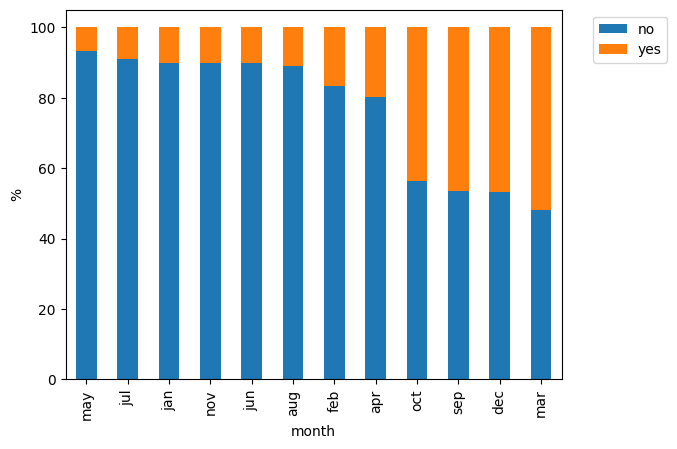

In [ ]:
# visualizando o percentual em gráfico
tabela.sort_values(by='yes').plot(kind='bar', stacked=True)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Target x pdays_categorico

In [ ]:
# tabela de frequências
pd.crosstab(index=df['pdays_categorico'], columns=df['y'])

y,no,yes
pdays_categorico,,
Mais de 1 mês,6188,1876
Menos de 1 mês,164,29
Nunca contatado,33570,3384


In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['pdays_categorico'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
pdays_categorico,,
Mais de 1 mês,76.736111,23.263889
Menos de 1 mês,84.974093,15.025907
Nunca contatado,90.842669,9.157331


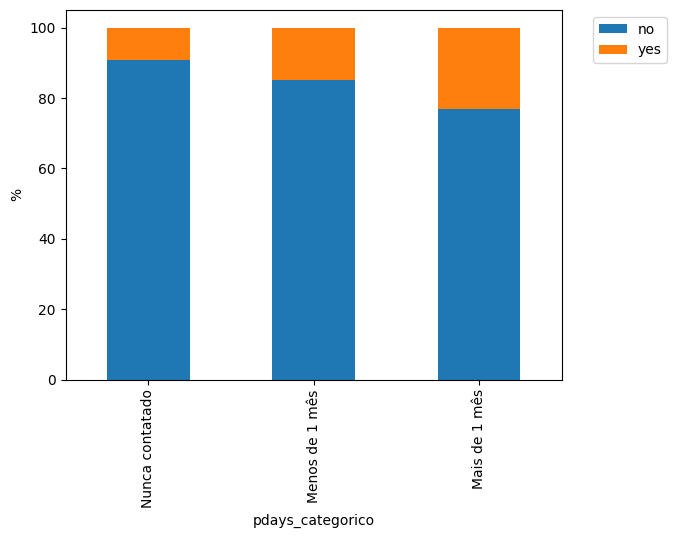

In [ ]:
# visualizando o percentual em gráfico
tabela.sort_values(by='yes').plot(kind='bar', stacked=True)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Target x poutcome

In [ ]:
# tabela de frequências
pd.crosstab(index=df['poutcome'], columns=df['y'])

y,no,yes
poutcome,,
failure,4283,618
success,533,978
unknown,35106,3693


In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['poutcome'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
poutcome,,
failure,87.390329,12.609671
success,35.274653,64.725347
unknown,90.481713,9.518287


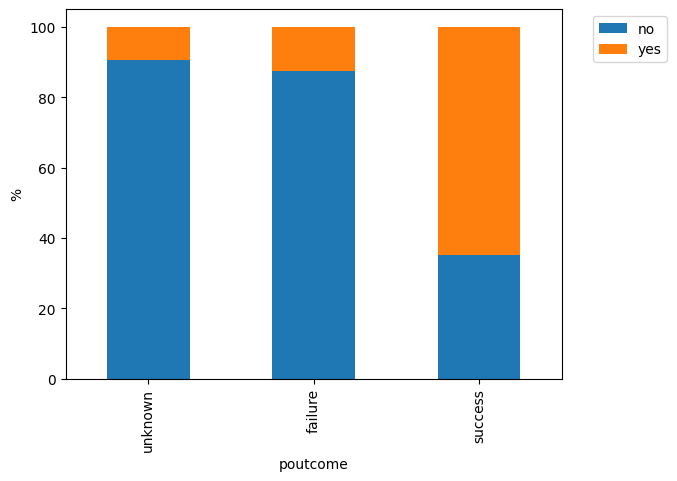

In [ ]:
# visualizando o percentual em gráfico
tabela.sort_values(by='yes').plot(kind='bar', stacked=True)
plt.ylabel('%')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Variáveis categóricas x numéricas

Para verificar a correlação entre as variáveis categóricas x numéricas, irei transformar provisoriamente as variáveis numéricas em categorias.

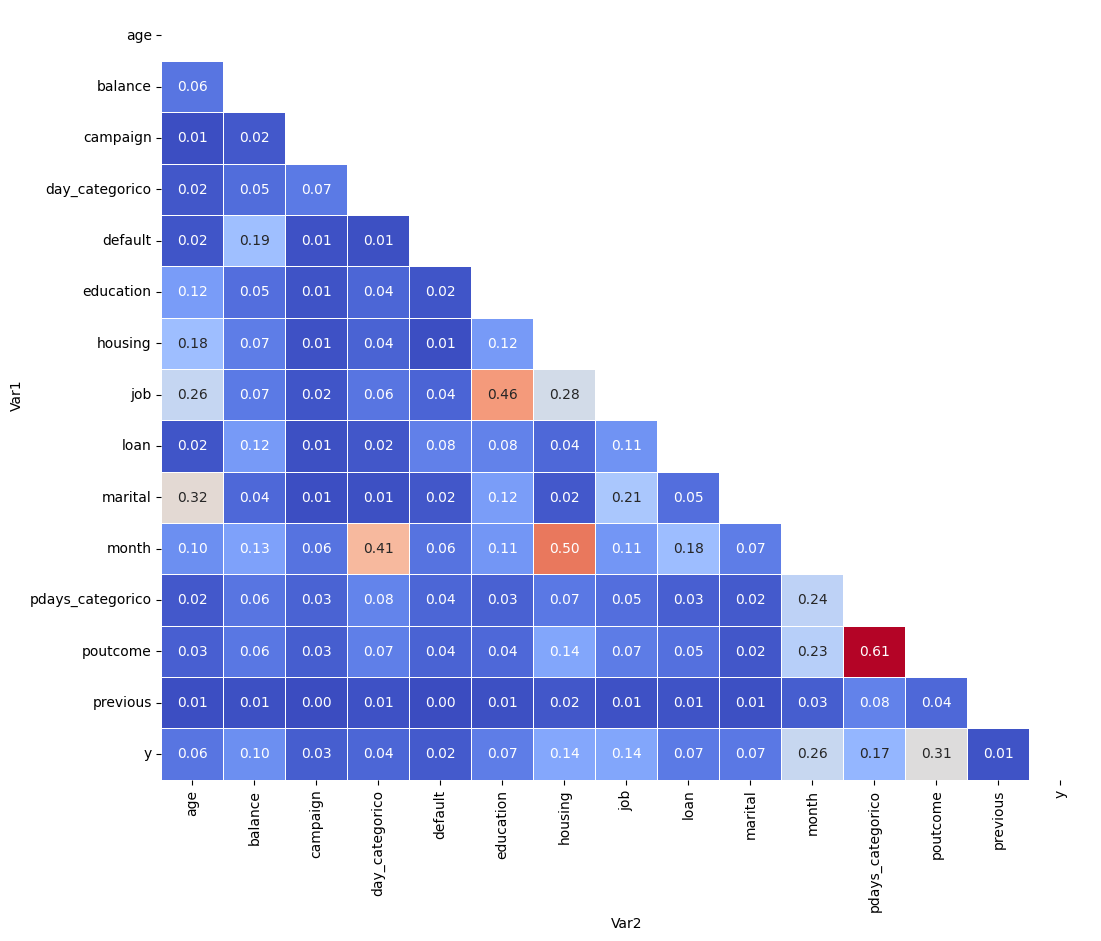

In [ ]:
# criando uma cópia de df
df_copia = df.copy()

# transformando as colunas numéricas em categorias
df_copia['age'] = pd.qcut(df_copia['age'], 4)
df_copia['balance'] = pd.qcut(df_copia['balance'], 4)
df_copia['campaign'] = pd.cut(df_copia['campaign'], 4)
df_copia['previous'] = pd.cut(df_copia['previous'], 4)

# calculando a correlação de Cramer
colunas_df_copia = df_copia.columns
cramersv_results = []
for var1 in colunas_df_copia:
  for var2 in colunas_df_copia:
    if var1 != var2:
      cramersv = association(pd.crosstab(df_copia[var1], df_copia[var2]),method='cramer')
      cramersv_results.append([var1, var2, cramersv])

cramersv_df = pd.DataFrame(cramersv_results, columns=['Var1', 'Var2', 'CramersV'])
cramersv_df = cramersv_df.pivot(index='Var1', columns='Var2', values='CramersV')

mask = np.triu(np.ones_like(cramersv_df, dtype=bool))

cramersv_df = cramersv_df.mask(mask)
cramersv_df = cramersv_df.round(3)

plt.figure(figsize=(12,10))
sns.heatmap(cramersv_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False)
plt.show()

Não há forte correlação entre a variável target (y) e nenhuma das outras variáveis, o que pode ser ruim para um modelo de previsão. Verificando agora a variável target (categorica) x variaveis numericas:

In [ ]:
# target x age
df.groupby(['y'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,40.838986,10.172662,18.0,33.0,39.0,48.0,95.0
yes,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0


<Axes: xlabel='y', ylabel='age'>

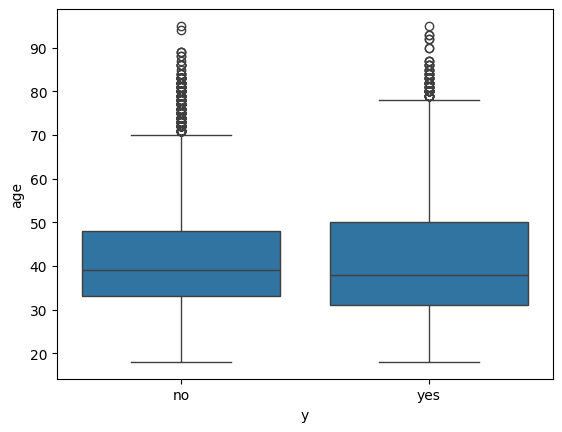

In [ ]:
sns.boxplot(x='y', y='age', data=df)

In [ ]:
# target x balance
df.groupby(['y'])['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,1303.714969,2974.195473,-8019.0,58.0,417.0,1345.0,102127.0
yes,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0


<Axes: xlabel='y', ylabel='balance'>

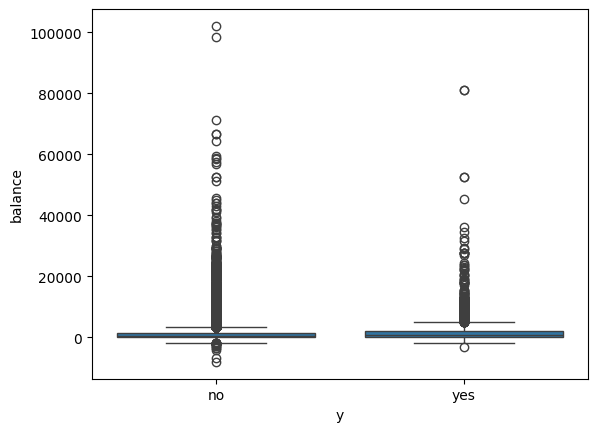

In [ ]:
sns.boxplot(x='y', y='balance', data=df)

In [ ]:
# target x campaign
df.groupby(['y'])['campaign'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,2.846350,3.212767,1.0,1.0,2.0,3.0,63.0
yes,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0


<Axes: xlabel='y', ylabel='campaign'>

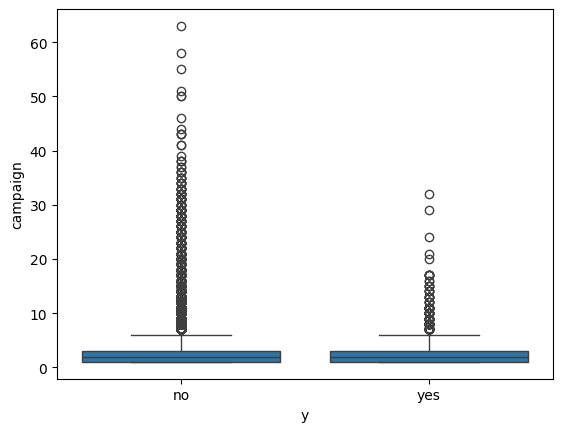

In [ ]:
sns.boxplot(x='y', y='campaign', data=df)

In [ ]:
# target x previous
df.groupby(['y'])['previous'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,0.495266,1.790397,0.0,0.0,0.0,0.0,51.0
yes,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


<Axes: xlabel='y', ylabel='previous'>

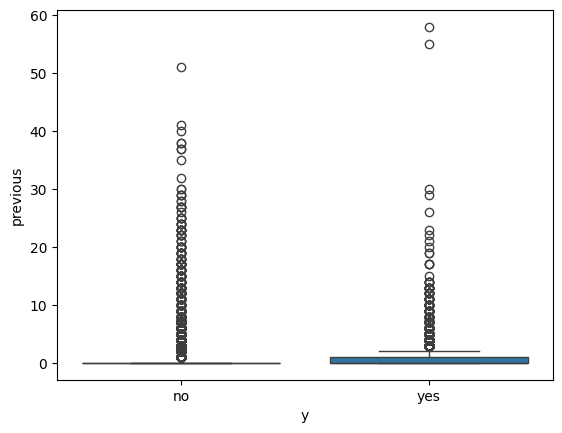

In [ ]:
sns.boxplot(x='y', y='previous', data=df)

# 4 - Teste de hipótese e perguntas de negócio

Com os gráficos do tópico anterior é possível extrair perguntas para verificar o perfil dos clientes que adquiriram ou não o produto. Muitas perguntas são possíveis, e aqui separei 3 delas:

*   Clientes que contrataram o produto de campanhas anteriores adquiriram mais o produto da campanha atual? (target x poutcome)
*   As pessoas que contrataram mais o produto possuem maior poder aquisitivo do que quem não contratou? (target x balance)
*   Existe diferença na taxa de contratação do produto de acordo com o mês em que ele é ofertado? (target x month)





## Target x poutcome

Aqui buscarei responder a pergunta "Clientes que contrataram o produto de campanhas anteriores adquiriram mais o produto da campanha atual?", e para isso será utilizado um teste de hipótese para proporção em 2 amostras (não irei considerar a classe unknown, supondo que o motivo para o cliente possuir essa classe seja aleatório, por limitações do sistema etc.). Dos clientes que adquiriram o produto atual, as hipóteses serão:

*   H0: Proporção de pessoas que aderiram campanhas anteriores = Proporção de pessoas que não aderiram campanhas anteriores
*   Ha: Proporção de pessoas que aderiram campanhas anteriores <> Proporção de pessoas que não aderiram campanhas anteriores




In [ ]:
# tabela de frequências
pd.crosstab(index=df['poutcome'], columns=df['y'])

y,no,yes
poutcome,,
failure,4283,618
success,533,978
unknown,35106,3693


In [ ]:
# percentual das frequências
tabela = pd.crosstab(index=df['poutcome'], columns=df['y'], normalize = 'index')*100
tabela

y,no,yes
poutcome,,
failure,87.390329,12.609671
success,35.274653,64.725347
unknown,90.481713,9.518287


In [ ]:
# definindo os parâmetros para o teste
frequencia_failure_yes = df.loc[(df['poutcome'] == 'failure') & (df['y'] == 'yes')].shape[0]
frequencia_success_yes = df.loc[(df['poutcome'] == 'success') & (df['y'] == 'yes')].shape[0]

total_failure = df.loc[df['poutcome'] == 'failure'].shape[0]
total_success = df.loc[df['poutcome'] == 'success'].shape[0]

perc_failure_yes = round(frequencia_failure_yes/total_failure*100,2)
perc_success_yes = round(frequencia_success_yes/total_success*100,2)

# checando se os parâmetros estão corretos
print("Do total de ",total_failure,"insucessos em campanhas anteriores,", frequencia_failure_yes,"aceitaram o produto atual, o que representa:",perc_failure_yes,"%" )
print("Do total de ",total_success,"sucessos em campanhas anteriores,", frequencia_success_yes,"aceitaram o produto atual, o que representa:",perc_success_yes,"%" )

Do total de  4901 insucessos em campanhas anteriores, 618 aceitaram o produto atual, o que representa: 12.61 %
Do total de  1511 sucessos em campanhas anteriores, 978 aceitaram o produto atual, o que representa: 64.73 %


In [ ]:
# realizando o teste de proporção para 2 amostras
z_stat,pvalue = proportions_ztest(count=[frequencia_failure_yes,frequencia_success_yes], nobs=[total_failure,total_success])
print(f"Z-statistic: {z_stat}")
print(f"P-value: {pvalue:.2f}")

Z-statistic: -40.96189431360799
P-value: 0.00


In [ ]:
# intervalo de confiança das proporções
(lower_failure, lower_success), (upper_failure, upper_success) = proportion_confint(count = [frequencia_failure_yes,frequencia_success_yes],
                                                                        nobs=[total_failure,total_success], alpha=0.05)

print(f'IC 95% para failure: [{lower_failure*100:.1f}, {upper_failure*100:.1f}]')
print(f'IC 95% para success: [{lower_success*100:.1f}, {upper_success*100:.1f}]')

IC 95% para failure: [11.7, 13.5]
IC 95% para success: [62.3, 67.1]


Como o p-valor é menor que 0.05 a hipótese nula é rejeitada, portanto é possível confirmar que as pessoas que aderiram ao produto de campanhas anteriores adquiriram mais o produto da campanha atual. Podemos dizer também que, a 95% de confiança:

*   Entre as pessoas que não aderiram a produtos de campanhas anteriores, entre 11,7% a 13,5% aderiram ao produto da campanha atual;
*   Entre as pessoas que aderiram a produtos de campanhas anteriores, entre 62,3% a 67,1% aderiram ao produto da campanha atual.





## Target x balance

Aqui irei responder a pergunta "As pessoas que contrataram mais o produto possuem maior poder aquisitivo do que quem não contratou?", e para isso utilizarei um teste de hipótese para média (2 amostras independentes com desvio-padrão populacional desconhecido). As hipóteses serão:

*   H0: Poder aquisitivo de quem contratou = Poder aquisitivo de quem não contratou
*   Ha: Poder aquisitivo de quem contratou <> Poder aquisitivo de quem não contratou

In [ ]:
# target x balance
df.groupby(['y'])['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,1303.714969,2974.195473,-8019.0,58.0,417.0,1345.0,102127.0
yes,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0


In [ ]:
# checando a variância
df.groupby(['y'])['balance'].agg(['var'])

,var
y,
no,8.845839e+06
yes,1.225773e+07


In [ ]:
# checando se as variâncias são iguais com o teste F (H0: variâncias são iguais; Ha: variâncias são diferentes)
balance_no = df.loc[df['y'] == 'no', 'balance']
balance_yes = df.loc[df['y'] == 'yes', 'balance']

# graus de liberdade
df1 = len(balance_no) - 1
df2 = len(balance_yes) - 1

# calculando F (maior variância no numerador) e o p-valor
F = balance_yes.var()/balance_no.var()
pvalue = (1 - st.f.cdf(F, df2, df1))*2
#a função .cdf pede como parâmetro primeiro o grau de liberdade do numerador (df2) e depois o do denominador (df1) de F
#multiplico por 2 porque o teste é bicaudal (H0: variâncias são iguais; Ha: variâncias são diferentes)
pvalue

2.220446049250313e-16

As variâncias são diferentes, portanto obtemos o parâmetro "equal_var" do teste de hipótese para 2 amostras independentes e o parâmetro "uservar" do intervalo de confiança.

In [ ]:
# teste de hipótese para 2 amostras independentes
result = st.ttest_ind(a=balance_no, b=balance_yes, equal_var=False, nan_policy = 'omit')
result.pvalue

4.3837327771001536e-23

In [ ]:
# intervalo de confiança para a diferença das médias
cm = sms.CompareMeans(sms.DescrStatsW(balance_yes), sms.DescrStatsW(balance_no))
cm.tconfint_diff(usevar='unequal')

(401.7711869734593, 599.334703725921)

Como o p-valor do teste de hipótese é menor que 0.05 a hipótese nula é rejeitada, portanto podemos dizer que, em média, o poder aquisitivo de quem contratou o produto é maior do que o poder aquisitivo de quem não contratou o produto. A diferença entre os dois grupos no saldo médio anual (balance) está entre 401 e 599 euros.

## Target x month

Aqui responderei à pergunta "Existe diferença na taxa de contratação do produto de acordo com o mês em que ele é ofertado?" e para isso utilizarei um teste de hipótese para associação. As hipóteses serão:

*   H0: Não existe dependência entre o mês e a taxa de contratação do produto
*   Ha: Existe dependência entre o mês e a taxa de contratação do produto



In [ ]:
# percentual das frequências
pd.crosstab(index=df['month'], columns=df['y'], normalize = 'index')*100

y,no,yes
month,,
apr,80.320600,19.679400
aug,88.986714,11.013286
dec,53.271028,46.728972
feb,83.352208,16.647792
jan,89.878831,10.121169
jul,90.906454,9.093546
jun,89.777195,10.222805
mar,48.008386,51.991614
may,93.280546,6.719454


In [ ]:
# tabela de frequências
tabela = pd.crosstab(index=df['month'], columns=df['y'])
tabela

y,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2208,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12841,925


In [ ]:
# execução do teste
chi2, p, dof, expected = chi2_contingency(tabela)
print(f"Valor do Qui-Quadrado: {chi2}")
print(f"P-valor: {p:.2f}")

Valor do Qui-Quadrado: 3061.838938445269
P-valor: 0.00


In [ ]:
meses = df['month'].unique()

for i in meses:
  # quantidade de contratação do produto em determinado mês
  frequencia_mes_yes = df.loc[(df['month'] == i) & (df['y'] == 'yes')].shape[0]

  # total de contatos em determinado mês
  total_mes = df.loc[df['month'] == i].shape[0]

  # intervalo de confiança do percentual de contratação do produto em determinado mês
  lower, upper = proportion_confint(count=frequencia_mes_yes, nobs=total_mes, alpha=0.05)

  # exibindo os resultados do intervalo de confiança
  print(f'IC 95% para o mês {i} : [{lower*100:.1f}, {upper*100:.1f}]')

IC 95% para o mês may : [6.3, 7.1]
IC 95% para o mês jun : [9.4, 11.0]
IC 95% para o mês jul : [8.4, 9.8]
IC 95% para o mês aug : [10.2, 11.8]
IC 95% para o mês oct : [40.2, 47.3]
IC 95% para o mês nov : [9.2, 11.1]
IC 95% para o mês dec : [40.0, 53.4]
IC 95% para o mês jan : [8.5, 11.7]
IC 95% para o mês feb : [15.2, 18.1]
IC 95% para o mês mar : [47.5, 56.5]
IC 95% para o mês apr : [18.2, 21.1]
IC 95% para o mês sep : [42.4, 50.5]


Como o p-valor do teste de hipótese é menor que 0.05 a hipótese nula é rejeitada, portanto é possível confirmar que a taxa de contratação do produto varia conforme o mês. O melhor mês em taxa de aceitação é março (47.5% a 56.5%) e o pior é maio (6.3% a 7.1%), porém devemos ter cuidado: os melhores meses em taxa de aceitação (oct, dec, mar e sep) também são os meses com menos contatos realizados (ver a tabela de frequências), o que pode indicar que nesses meses foram feitos contatos a grupos já identificados como mais propensos à contratação do produto. Como não é possível obter essa informação (exigiria conhecimento sobre o negócio), irei supor que os contatos foram aleatórios.

# 5 - Regressão logística

Agora que já foram obtidas informações sobre o perfil dos clientes partirei para a construção de um modelo de regressão logística. A idéia é verificar como cada variável influencia na probabilidade de adquirir o produto (inferência) e obter um modelo que prevê se um cliente irá adquirir ou não o produto (previsão).

## Preparando o dataset

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day_categorico,month,campaign,pdays_categorico,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,Início do mês,may,1,Nunca contatado,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,Início do mês,may,1,Nunca contatado,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,Início do mês,may,1,Nunca contatado,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,Início do mês,may,1,Nunca contatado,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,Início do mês,may,1,Nunca contatado,0,unknown,no


In [ ]:
# transformando a variável target em binário
df.loc[df['y'] == 'yes', 'y_bin'] = 1
df.loc[df['y'] == 'no', 'y_bin'] = 0

In [ ]:
# transformando as variáveis categóricas em dummies
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan',
       'day_categorico', 'month', 'pdays_categorico', 'poutcome'])

In [ ]:
# substituindo caracteres especiais por "_"
df.columns = [col.replace(' ', '_').replace('/', '_').replace('.', '').replace('-', '_').replace('(', '_').replace(')', '_') for col in df.columns]

In [ ]:
# checando as colunas
df.columns

Index(['age', 'balance', 'campaign', 'previous', 'y', 'y_bin', 'job_admin',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'day_categorico_Fim_do_mês',
       'day_categorico_Início_do_mês', 'month_apr', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'pdays_categorico_Mais_de_1_mês', 'pdays_categorico_Menos_de_1_mês',
       'pdays_categorico_Nunca_contatado', 'poutcome_failure',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [ ]:
# selecionando as variáveis de interesse e referência
variaveis_interesse = [# Variaveis numericas
                      'age', 'balance', 'campaign', 'previous',

                      # Variavel "job" - Referência: job_blue-collar
                      'job_admin','job_entrepreneur', 'job_housemaid', 'job_unknown',
                      'job_management', 'job_retired', 'job_self_employed', 'job_services',
                      'job_student', 'job_technician', 'job_unemployed',

                      # Variavel "Marital" - Referência: marital_married
                      'marital_divorced', 'marital_single',

                      # Variavel "education" - Referência: education_primary
                      'education_secondary', 'education_tertiary','education_unknown',

                      # Variavel "default" - Referência: default_yes
                      'default_no',

                      # Variavel "housing" - Referência: housing_yes
                      'housing_no',

                      # Variavel "loan" - Referência: loan_yes
                      'loan_no',

                      # Variavel "day_categorico" - Referência: day_categorico_Fim_do_mês
                      'day_categorico_Início_do_mês',

                      # Variavel "month" - Referência: month_may, utilizarei maio porque vi no teste de hipótese que é o pior mês
                      'month_apr', 'month_aug', 'month_dec','month_feb', 'month_jan', 'month_jul',
                      'month_jun', 'month_mar', 'month_nov', 'month_oct', 'month_sep',

                      # Variavel "pdays_categorico" - Referência: pdays_categorico_Nunca_contatado
                      'pdays_categorico_Mais_de_1_mês', 'pdays_categorico_Menos_de_1_mês',

                      # Variavel "poutcome" - Referência: poutcome_failure
                      'poutcome_success', 'poutcome_unknown']

In [ ]:
# separando o dataset em treino (70%) e teste (30%)
x = df[variaveis_interesse]
y = df['y_bin']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Inferência

In [ ]:
# criando a fórmula da regressão logística
formula = 'y_bin ~ ' + ' + '.join(variaveis_interesse)
print(formula)

y_bin ~ age + balance + campaign + previous + job_admin + job_entrepreneur + job_housemaid + job_unknown + job_management + job_retired + job_self_employed + job_services + job_student + job_technician + job_unemployed + marital_divorced + marital_single + education_secondary + education_tertiary + education_unknown + default_no + housing_no + loan_no + day_categorico_Início_do_mês + month_apr + month_aug + month_dec + month_feb + month_jan + month_jul + month_jun + month_mar + month_nov + month_oct + month_sep + pdays_categorico_Mais_de_1_mês + pdays_categorico_Menos_de_1_mês + poutcome_success + poutcome_unknown


In [ ]:
# treinando o modelo
model = smf.glm(formula=formula, data=x_train.join(y_train), family=sm.families.Binomial())
modelo_fitado = model.fit()

# print do sumário
print(modelo_fitado.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  y_bin   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31607
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9629.9
Date:                Sat, 02 Nov 2024   Deviance:                       19260.
Time:                        21:57:42   Pearson chi2:                 3.21e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1057
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Filtrando quais variáveis não são significativas (a 90% de confiança):

In [ ]:
# filtrando variáveis com p-valor > 0.10
p_valor = modelo_fitado.pvalues
variaveis_nao_relevantes = p_valor[p_valor > 0.10]
print(variaveis_nao_relevantes)

job_entrepreneur[T.True]                   0.718616
job_housemaid[T.True]                      0.511967
job_unknown[T.True]                        0.272963
job_management[T.True]                     0.328364
job_self_employed[T.True]                  0.780425
job_services[T.True]                       0.604457
job_technician[T.True]                     0.824058
education_unknown[T.True]                  0.192543
default_no[T.True]                         0.442017
month_jan[T.True]                          0.684154
pdays_categorico_Menos_de_1_mês[T.True]    0.662174
age                                        0.803148
dtype: float64


No tópico 2 eu decidi manter os valores ausentes das colunas "job" e "education" porque eles poderiam ser informações do tipo MNAR, porém aqui é possível notar que esses valores não são relevantes. Apesar disso, irei manter as linhas que possuem valores ausentes nessas colunas porque a exclusão delas é perda de informaçao e pode prejudicar os resultados.

As variáveis "default" e "age" serão removidas porque não são relevantes para o modelo. Optei por manter as variáveis categóricas que possuem pelo menos uma classe significativa (a 90% de confiança).

In [ ]:
# removendo variáveis não relevantes
variaveis_interesse2 = variaveis_interesse.copy()
variaveis_interesse2.remove('default_no')
variaveis_interesse2.remove('age')

In [ ]:
# criando um novo modelo sem as variáveis não relevantes
formula2 = 'y_bin ~ ' + ' + '.join(variaveis_interesse2)
model2 = smf.glm(formula=formula2, data=x_train.join(y_train), family=sm.families.Binomial())
modelo_fitado2 = model2.fit()

print(modelo_fitado2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  y_bin   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31609
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9630.3
Date:                Sat, 02 Nov 2024   Deviance:                       19261.
Time:                        21:57:43   Pearson chi2:                 3.21e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1057
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

Irei calcular agora a Razão de Chances (odds ratio). Neste caso, o valor da Razão de Chances indica o tamanho da probabilidade de uma determinada classe pertencer ao target (adquirir o produto) se comparado com a sua classe de referência (não se aplica às variáveis numéricas).

In [ ]:
# calculando a razão de chances (odds ratio)
razao_chances =  np.exp(modelo_fitado2.params)
razao_chances = pd.DataFrame(razao_chances)
razao_chances.columns = ['RC']

# calculando o intervalo de confiança para as razões de chance
ic_razao_chances = np.exp(modelo_fitado2.conf_int())
ic_razao_chances.columns = ['2.5%', '97.5%']
ic_razao_chances

# juntando a razão de chance com seu intervalo de confiança
razao_chances_concat = pd.concat([razao_chances, ic_razao_chances], axis=1)
razao_chances_concat = razao_chances_concat.reset_index()
razao_chances_concat = razao_chances_concat.rename(columns={'index': 'variavel'})
razao_chances_concat = razao_chances_concat[razao_chances_concat['variavel'] != 'Intercept']

razao_chances_concat

,variavel,RC,2.5%,97.5%
1,job_admin[T.True],1.140277,0.981165,1.325191
2,job_entrepreneur[T.True],0.952759,0.737503,1.230843
3,job_housemaid[T.True],0.918334,0.706221,1.194156
4,job_unknown[T.True],0.759605,0.461538,1.250170
5,job_management[T.True],1.080788,0.927384,1.259568
6,job_retired[T.True],1.673502,1.409441,1.987036
7,job_self_employed[T.True],1.033548,0.822660,1.298496
8,job_services[T.True],1.046177,0.883935,1.238198
9,job_student[T.True],1.545594,1.227846,1.945572
10,job_technician[T.True],1.017171,0.881617,1.173567


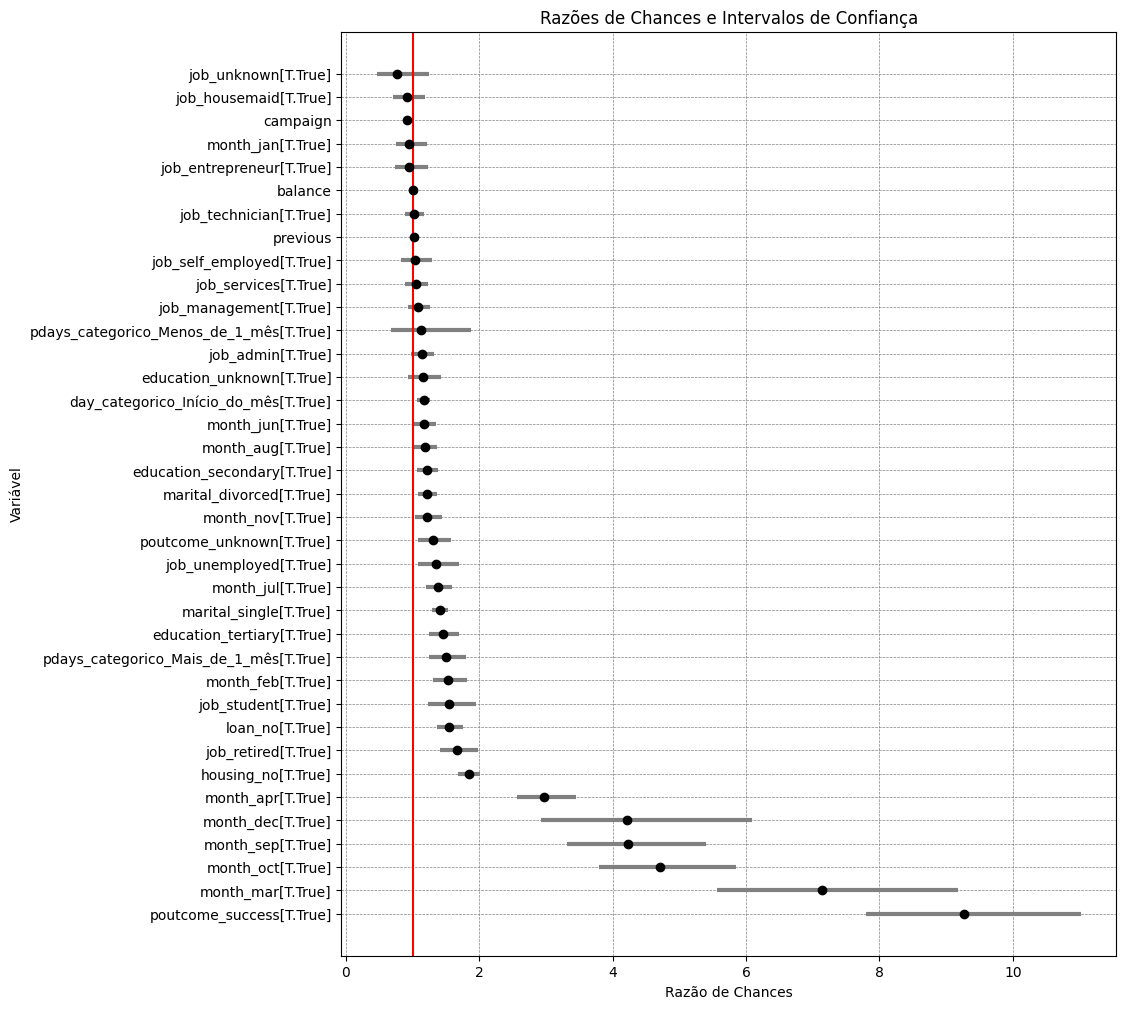

In [ ]:
# plotando o gráfico da razão de chance
razao_chances_concat = razao_chances_concat.sort_values(by='RC', ascending=False)

plt.figure(figsize=(10, 12))
plt.errorbar(razao_chances_concat['RC'],
             razao_chances_concat['variavel'],
             xerr=(razao_chances_concat['RC'] - razao_chances_concat['2.5%'],
                   razao_chances_concat['97.5%'] - razao_chances_concat['RC']),
             fmt='o',
             color='black',
             ecolor='gray',
             elinewidth=3,
             capsize=0)
plt.axvline(x=1, color='red', linestyle='-')
plt.xlabel('Razão de Chances')
plt.ylabel('Variável')
plt.title('Razões de Chances e Intervalos de Confiança')
plt.grid(True)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()



Com os resultados desse tópico eu destaco os seguintes insights:




*   **Variável default:** o cliente possuir ou não crédito inadimplente não influencia na chance dele adquirir o produto;
*   **Variável age:** a idade do cliente não influencia na chance dele adquirir o produto;
*   **Variável balance:** quanto maior o poder aquisitivo do cliente maior a chance dele adquirir o produto;

*   **Variável previous:** quanto mais contatos realizados com o cliente antes dessa campanha maiores as chances dele adquirir o produto, embora essa possa ser uma variável confundidora porque clientes mais antigos provavelmente foram mais contatados. Clientes mais antigos talvez confiem mais nesse banco (por isso não foram para outro) e isso pode afetar a adesão à campanha, porém não há como confirmar com os dados disponíveis;
*   **Variável campaign:** quanto mais contatos feitos nessa campanha menores as chances do cliente adquirir o produto, embora essa também possa ser uma variável confundidora porque clientes que contrataram o produto na primeira ligação não precisam receber mais ligações;
*   **Variável job:** clientes com a profissão "retired" têm 67% a mais de chance de adquirir o produto do que clientes com a profissão "blue-collar";
*   **Variável marital:** clientes solteiros têm 40% a mais de chance de adquirir o produto do que clientes casados;
*   **Variável education:** clientes com nível de educação "tertiary" têm 45% a mais de chance de adquirir o produto do que clientes com a educação "primary";
*   **Variável housing:** clientes que não possuem empréstimo imobiliário têm 84% a mais de chance de adquirir o produto do que clientes que possuem empréstimo imobiliário;
*   **Variável loan:** clientes que não possuem empréstimo pessoal têm 54% a mais de chance de adquirir o produto do que clientes que possuem empréstimo pessoal;
*   **Variável month:** contatos realizados em março (o melhor mês) têm 7 vezes mais chance de sucesso do que contatos realizados em maio (o pior mês);
*   **Variável pdays_categorico:** clientes que foram contatados há mais de 1 mês para uma campanha anterior têm 49% a mais de chance de adquirir o produto se comparado com clientes nunca contatados;
*   **Variável poutcome:** clientes que adquiriram o produto de campanhas anteriores têm 9 vezes mais chance de adquirir o produto da campanha atual do que aqueles que não adquiriram o produto de campanhas anteriores;
*   **Variável poutcome:** clientes da classe "unknown" têm 30% a mais de chance de adquirir o produto do que os clientes que não adquiriram o produto de campanhas anteriores, porém não há como saber o que está dentro de unknown (irei considerar que é aleatória a distribuição entre contratação e não contratação do produto de campanha anterior);

A tabela e o gráfico da razão de chances fornece também outros cruzamentos (por exemplo comparar o percentual de outubro com maio).

## Previsão

Verificando a previsão do modelo, considerando que os clientes que não irão adquirir o produto são aqueles com uma chance inferior a 50%:

In [ ]:
# testando a previsão do modelo, se a chance for menor que 50% ficará marcado como 0, ou seja, o cliente não irá adquirir o produto para o modelo
previsoes_modelo_2 = modelo_fitado2.predict(x_test)
previsoes_atribuidas = [ 0 if x < 0.5 else 1 for x in previsoes_modelo_2]

cfm = confusion_matrix(y_test, previsoes_atribuidas)

tn = cfm[0][0]
fp = cfm[0][1]
fn = cfm[1][0]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(y_test, previsoes_atribuidas)
accuracy = accuracy_score(y_test, previsoes_atribuidas)

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

print('Confusion Matrix: \n', cfm, '\n')
print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Specificity: \n', especificidade, '\n')

True Negative: 11812
False Positive: 154
False Negative: 1303
True Positive: 295
Confusion Matrix: 
 [[11812   154]
 [ 1303   295]] 

Balanced accuracy: 
 0.5858679797180874 

Accuracy: 
 0.8925833087584784 

Sensitivity: 
 0.1846057571964956 

Specificity: 
 0.9871302022396791 



No geral o modelo teve um desempenho razoável, acertando 58,6% das previsões. Porém a Sensitivity foi muito baixa (18,5%) e a Specificity muito alta (98,7%), indicando que o modelo identifica bem os clientes que não irão adquirir o produto, mas tem dificuldade para identificar os clientes que irão adquirir o produto. Pensando no tipo de negócio vou considerar que falsos positivos não são erros graves, e portanto irei verificar a previsão do modelo novamente. Agora, porém, só serão considerados clientes que não irão adquirir o produto aqueles com uma chance inferior a 20%:

In [ ]:
# testando a previsão do modelo, se a chance for menor que 20% ficará marcado como 0, ou seja, o cliente não irá adquirir o produto para o modelo
previsoes_modelo_2 = modelo_fitado2.predict(x_test)
previsoes_atribuidas = [ 0 if x < 0.2 else 1 for x in previsoes_modelo_2]

cfm = confusion_matrix(y_test, previsoes_atribuidas)

tn = cfm[0][0]
fp = cfm[0][1]
fn = cfm[1][0]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(y_test, previsoes_atribuidas)
accuracy = accuracy_score(y_test, previsoes_atribuidas)

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

print('Confusion Matrix: \n', cfm, '\n')
print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Specificity: \n', especificidade, '\n')

True Negative: 11201
False Positive: 765
False Negative: 972
True Positive: 626
Confusion Matrix: 
 [[11201   765]
 [  972   626]] 

Balanced accuracy: 
 0.6639042681841354 

Accuracy: 
 0.8719404305514598 

Sensitivity: 
 0.39173967459324155 

Specificity: 
 0.9360688617750292 



O resultado é uma melhora nas previsões gerais do modelo, agora acertando 66,4%. A Sensitivity também melhorou (agora é 39,2%), indicando que o modelo está bem melhor na previsão dos clientes que irão adquirir o produto. A Specificity diminuiu e agora é 93,6%, porém continua sendo um excelente valor, indicando que o modelo prevê bem os clientes que não irão adquirir o produto.

No tópico 3 - Análise Descritiva > Variáveis categóricas x categóricas foi verificado que as variáveis "pdays_categorico" e "poutcome" possuem elevada correlação entre si, e isso pode atrapalhar o modelo. Como "poutcome" possui maior correlação com a variável target eu irei retirar a variável "pdays_categorico" e avaliar se as previsões melhoram.

In [ ]:
# removendo a variável pdays_categorico
variaveis_interesse3 = variaveis_interesse2.copy()
variaveis_interesse3.remove('pdays_categorico_Mais_de_1_mês')
variaveis_interesse3.remove('pdays_categorico_Menos_de_1_mês')

In [ ]:
# fitando o modelo sem a variável pdays_categorico
formula3 = 'y_bin ~ ' + ' + '.join(variaveis_interesse3)
model3 = smf.glm(formula=formula3, data=x_train.join(y_train), family=sm.families.Binomial())
modelo_fitado3 = model3.fit()

In [ ]:
# verificando as previsões do modelo sem a variável pdays_categorico
previsoes_modelo_3 = modelo_fitado3.predict(x_test)
previsoes_atribuidas = [ 0 if x < 0.2 else 1 for x in previsoes_modelo_3]

cfm = confusion_matrix(y_test, previsoes_atribuidas)

tn = cfm[0][0]
fp = cfm[0][1]
fn = cfm[1][0]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(y_test, previsoes_atribuidas)
accuracy = accuracy_score(y_test, previsoes_atribuidas)

sensibilidade = tp / (tp + fn)
especificidade = tn / (tn + fp)

print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

print('Confusion Matrix: \n', cfm, '\n')
print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Specificity: \n', especificidade, '\n')

True Negative: 11205
False Positive: 761
False Negative: 979
True Positive: 619
Confusion Matrix: 
 [[11205   761]
 [  979   619]] 

Balanced accuracy: 
 0.6618811706175424 

Accuracy: 
 0.8717192568563845 

Sensitivity: 
 0.38735919899874843 

Specificity: 
 0.9364031422363363 



O desempenho do modelo com a variável pdays_categorico é levemente melhor, embora seja um modelo mais complexo. Supondo que obter os valores dessa variável não seja um custo/problema adicional, irei considerar o modelo com a variável pdays_categorico como nosso modelo final.

De uma forma geral o modelo obtido teve um bom desempenho. Alguns fatores têm impacto negativo para as suas previsões, como a alta quantidade de valores "unknowns" na variável com maior Razão de Chances (poutcome) e a baixa correlação entre as variáveis independentes e a target. Buscar melhorar essa alta taxa de valores desconhecidos e testar novas variáveis com maior correlação são formas de melhorar o modelo.

# 6 - Conclusões

As seguintes conclusões foram obtidas com a análise realizada:

*   O modelo acertou 66,4% das previsões de clientes que irão adquirir ou não o produto, sendo um resultado positivo;
*   O cliente possuir ou não crédito inadimplente não influencia na chance dele adquirir o produto;

*   A idade do cliente não influencia na chance dele adquirir o produto;

*   Quanto maior o poder aquisitivo do cliente maior a chance dele adquirir o produto. Em média, a diferença no "balance" entre o grupo das pessoas que adquiriram o produto e o grupo que não adquiriu está entre 401 e 599 euros;

*   Clientes com a profissão "retired" têm 67% a mais de chance de adquirir o produto do que clientes com a profissão "blue-collar";

*   Clientes solteiros têm 40% a mais de chance de adquirir o produto do que clientes casados;
*   Clientes com nível de educação "tertiary" têm 45% a mais de chance de adquirir o produto do que clientes com a educação "primary";
*   Clientes que não possuem empréstimo imobiliário têm 84% a mais de chance de adquirir o produto do que clientes que possuem;
*   Clientes que não possuem empréstimo pessoal têm 54% a mais de chance de adquirir o produto do que clientes que possuem;
*   Contatos realizados em março (o melhor mês) têm 7 vezes mais chance de sucesso do que contatos realizados em maio (o pior mês);

*   Clientes que adquiriram o produto de campanhas anteriores têm 9 vezes mais chance de adquirir o produto da campanha atual (em comparação com aqueles que não adquiriram o produto de campanhas anteriores);



A partir das informações acima é possível traçar as seguintes ações:



*   Realizar campanhas focadas no perfil de clientes que possuem maior chance de adquirir o produto. Por exemplo, uma comunicação focada em indíviduos solteiros e com ensino superior, destacando benefícios financeiros do produto a longo prazo;

*   Criar um calendário de campanhas, focando os esforços para esse produto nos meses mais propensos à contratação;
*   Utilizar o modelo para identificar os clientes com maior chance de se interessar pelo produto, potencialmente diminuindo esforços e custos. O modelo também pode ser melhorado utilizando novos dados, buscando outras variáveis e verificando com os times de engenharia se é possível melhorar a taxa de valores "unknowns". Outras técnicas de previsão podem ser mais robustas a depender da necessidade, também sendo benéfico contatar o time de ciência de dados;
*   Possivelmente criar pacotes de produtos recomendados a cada grupo de clientes, o que pode exigir estudos adicionais com outros produtos e/ou estudos de segmentação de clientes;

*   Realizar estudos adicionais com foco nos perfis com baixa probabilidade de adquirir o produto, pois isso pode revelar oportunidades para o negócio. Perguntas do tipo "Nós temos algum produto que atenda esses clientes? Se não, é possível desenvolver um? Qual a necessidade deles?" devem ser feitas.


*   Monitorar o desempenho do produto com indicadores-chave (KPI's) e avaliar os ganhos financeiros após a aplicação dessas ações.

Em resumo, análises desse tipo fornecem insights valiosos que beneficiam tanto a empresa quanto o cliente. Aplicar uma abordagem orientada por dados no dia a dia do negócio fortalece o relacionamento com o consumidor e aumenta as chances de sucesso de futuras decisões.
